# CleanChoice Energy Data Analysis Demo (Python & SQL )

## Rasim Salimov

### The Jupyer notebook below is a brief data analysis which showcases visualization, data anomaly detection, and SQL skills for the Data Analyst position at CleanChoice Energy. The dataset is taken from EIA and is avaialble to public access.

In [1]:
import pandas as pd
import numpy as np
import math
import time
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install pandasql

from pandasql import sqldf

# Data Goveranance

In [3]:
data_lineage_info = """
Data Source: U.S. Energy Information Administration
Data Loaded: [Date]
Transformations: Missing value handling, data type standardization, anomaly detection
"""
#checking the document for any ethical issues
ethical_considerations = """
Ethical Review:
- No personal data included.
- Data used for general energy analysis with no potential for harm.
"""

print(ethical_considerations)

print(data_lineage_info)



Ethical Review:
- No personal data included.
- Data used for general energy analysis with no potential for harm.


Data Source: U.S. Energy Information Administration
Data Loaded: [Date]
Transformations: Missing value handling, data type standardization, anomaly detection



# Loading the data

In [4]:
file_path = '/Users/rasimsalimov/Downloads/Table_10.1_Renewable_Energy_Production_and_Consumption_by_Source.xlsx'

In [5]:
energy_path = pd.read_excel(file_path)

In [6]:
#analysing the data
energy_path.head()

,U.S. Energy Information Administration,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,December 2023 Monthly Energy Review,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Note: Information about data precision.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Release Date: December 21, 2023",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data Cleaning


In [7]:
#skipping unimportant rows]
skip_rows = 10

In [8]:
energy_data = pd.read_excel(file_path, skiprows=skip_rows)

In [9]:
#showing the first few rows to further the analysis
energy_data.head()

,Month,Wood Energy Production,Biofuels Production,Total Biomass Energy Production,Total Renewable Energy Production,Hydroelectric Power Consumption,Geothermal Energy Consumption,Solar Energy Consumption,Wind Energy Consumption,Wood Energy Consumption,Waste Energy Consumption,Biofuels Consumption,Total Biomass Energy Consumption,Total Renewable Energy Consumption
0,NaT,(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu),(Trillion Btu)
1,1973-01-01,129.63,Not Available,129.787,219.839,89.562,0.49,Not Available,Not Available,129.63,0.157,Not Available,129.787,219.839
2,1973-02-01,117.194,Not Available,117.338,197.33,79.544,0.448,Not Available,Not Available,117.194,0.144,Not Available,117.338,197.33
3,1973-03-01,129.763,Not Available,129.938,218.686,88.284,0.464,Not Available,Not Available,129.763,0.176,Not Available,129.938,218.686
4,1973-04-01,125.462,Not Available,125.636,209.33,83.152,0.542,Not Available,Not Available,125.462,0.174,Not Available,125.636,209.33


In [10]:
#Cleaning
energy_data = energy_data.drop(0)

# Replace 'Not Available' with NaN (missing value indicator in pandas)
energy_data.replace('Not Available', np.nan, inplace=True)

#converting month column to a datetime object and then i split it into year and month columns
energy_data['Year'] = energy_data['Month'].dt.year
energy_data['Month'] = energy_data['Month'].dt.month

#converting all the other columns to numeric types, errors='coerce' will handle any conversion errors
for column in energy_data.columns[1:-2]:  #skip month and the last two col, since it is in correct format
    energy_data[column] = pd.to_numeric(energy_data[column], errors='coerce')

In [11]:
#checking for duplicate entries
if energy_data.duplicated().sum() > 0:
    print("Data contains duplicate entries. Further investigation required.")
else:
    print("No duplicate entries found.")

#checking for impossible values
if (energy_data['Solar Energy Consumption'] < 0).any():
    print("Negative values found in Solar Energy Consumption.")

No duplicate entries found.


# Data Exploration

In [12]:
#total renewable energy a year
total_energy_by_year = energy_data.groupby('Year').sum().reset_index()


#solar energy consumption trend
#check if exists, if exsits, then plot.
solar_energy_col = 'Solar Energy Consumption'
if solar_energy_col in energy_data.columns:
    solar_trend = energy_data.groupby('Year')[solar_energy_col].sum().reset_index()
else:
    solar_trend = None

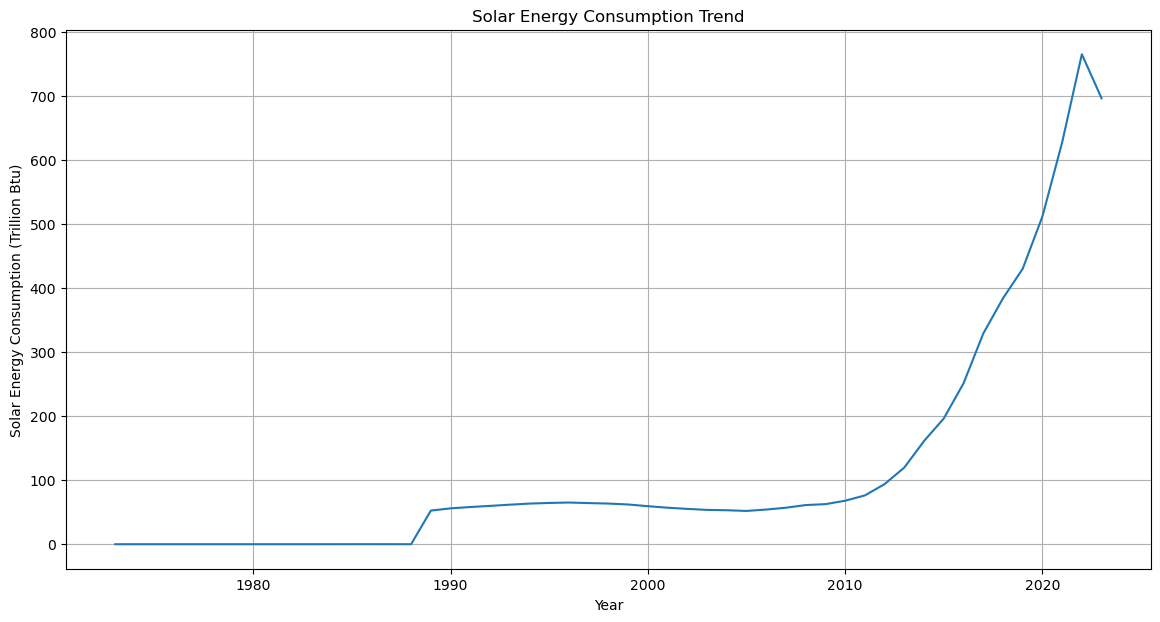

In [13]:
#vis
plt.figure(figsize=(14, 7))
sns.lineplot(data=solar_trend, x='Year', y='Solar Energy Consumption')
plt.title('Solar Energy Consumption Trend')
plt.xlabel('Year')
plt.ylabel('Solar Energy Consumption (Trillion Btu)')
plt.grid(True)
plt.show()


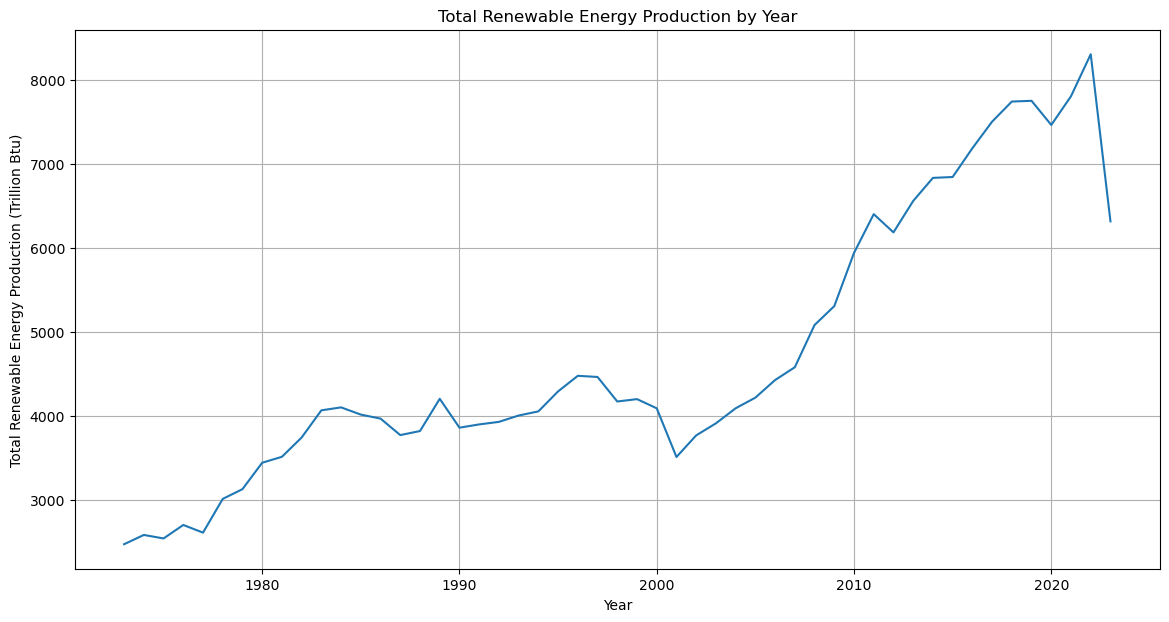

In [14]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=total_energy_by_year, x='Year', y='Total Renewable Energy Production')
plt.title('Total Renewable Energy Production by Year')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Production (Trillion Btu)')
plt.grid(True)
plt.show()


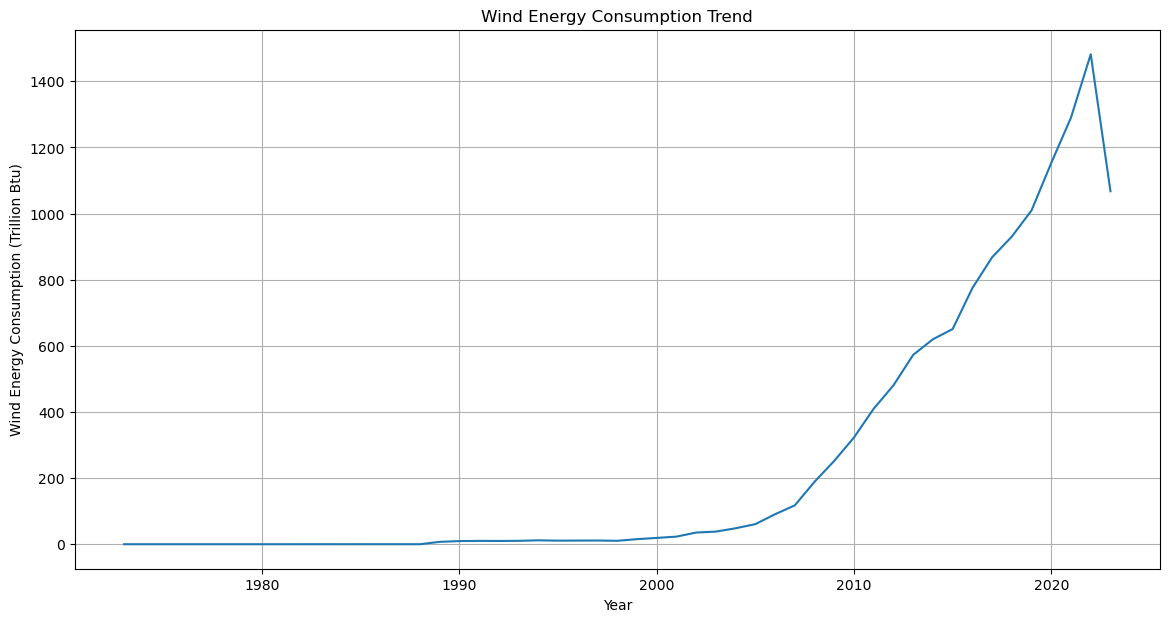

In [15]:
wind_energy_col = 'Wind Energy Consumption'

# Check if the 'Wind Energy Consumption' column exists
if wind_energy_col in energy_data.columns:
    wind_trend = energy_data.groupby('Year')[wind_energy_col].sum().reset_index()
    
    # Plot the trend of Wind Energy Consumption over time
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=wind_trend, x='Year', y=wind_energy_col)
    plt.title('Wind Energy Consumption Trend')
    plt.xlabel('Year')
    plt.ylabel('Wind Energy Consumption (Trillion Btu)')
    plt.grid(True)
    plt.show()
else:
    print("Wind Energy Consumption data is not available for plotting.")


# We can see a very significant drop in the year 2023, this is due to the fact that the data in 2023 isn't complete, so we should drop 2023 in our visualizations to paint a correct picture.


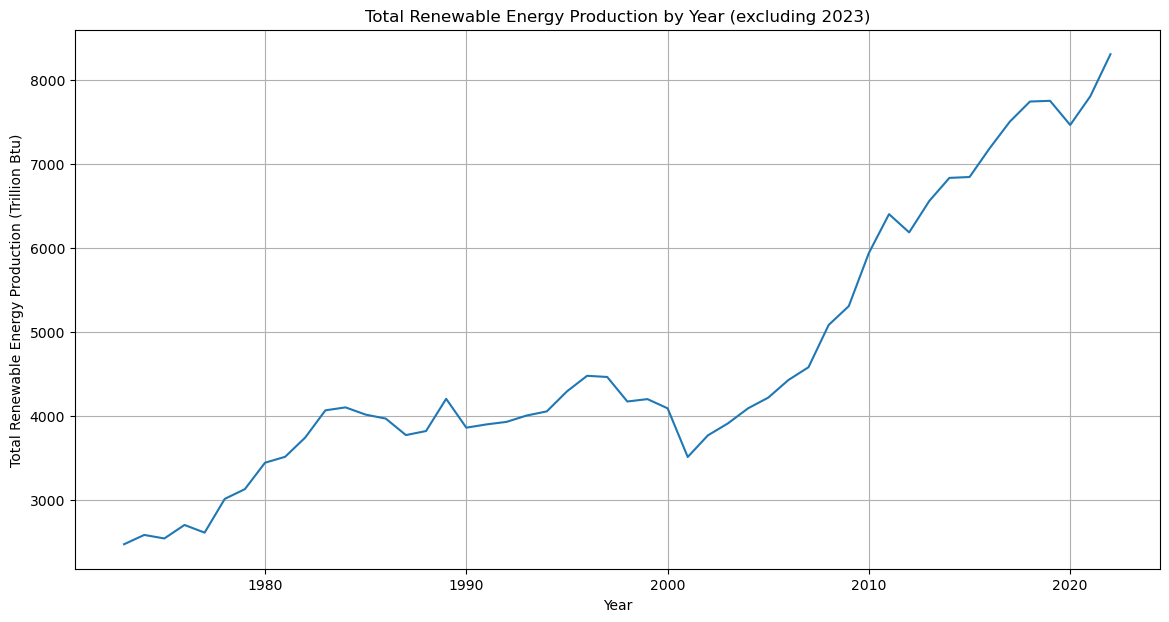

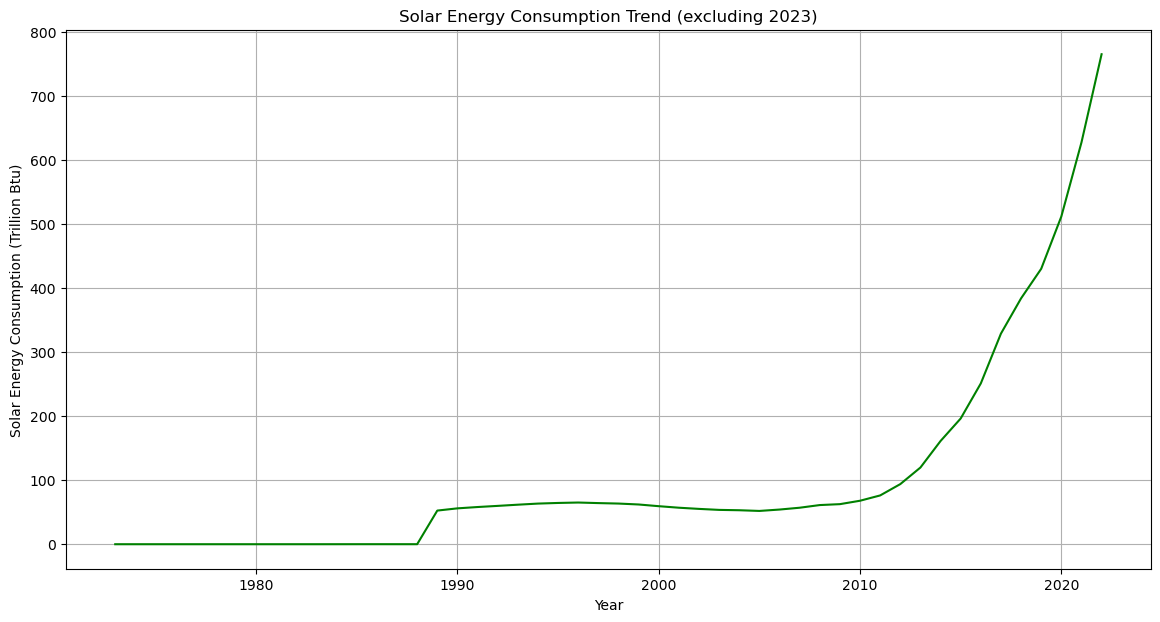

In [16]:
#excluding the year 2023
total_energy_by_year_no_2023 = total_energy_by_year[total_energy_by_year['Year'] != 2023]

#same idea as before, just plotting while excluding 2023.
plt.figure(figsize=(14, 7))
sns.lineplot(data=total_energy_by_year_no_2023, x='Year', y='Total Renewable Energy Production')
plt.title('Total Renewable Energy Production by Year (excluding 2023)')
plt.xlabel('Year')
plt.ylabel('Total Renewable Energy Production (Trillion Btu)')
plt.grid(True)
plt.show()

if solar_trend is not None:
    solar_trend_no_2023 = solar_trend[solar_trend['Year'] != 2023]
    
    
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=solar_trend_no_2023, x='Year', y='Solar Energy Consumption', color = 'green')
    plt.title('Solar Energy Consumption Trend (excluding 2023)')
    plt.xlabel('Year')
    plt.ylabel('Solar Energy Consumption (Trillion Btu)')
    plt.grid(True)
    
    plt.show()


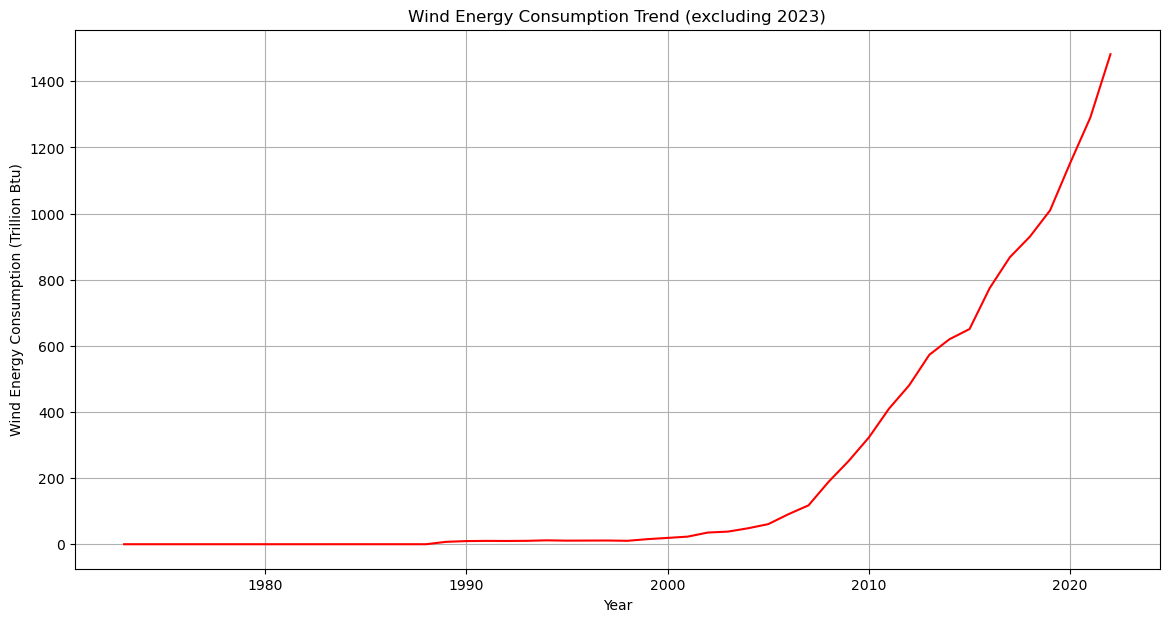

In [17]:
#removing 2023 rows.
energy_data_no_2023 = energy_data[energy_data['Year'] != 2023]

#new plot excluding the year 2023.
wind_trend_no_2023 = energy_data_no_2023.groupby('Year')[wind_energy_col].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=wind_trend_no_2023, x='Year', y=wind_energy_col, color='Red')
plt.title('Wind Energy Consumption Trend (excluding 2023)')
plt.xlabel('Year')
plt.ylabel('Wind Energy Consumption (Trillion Btu)')
plt.grid(True)
plt.show()


# Using the 1.5 x IQR Rule to detect Data Anomalies.


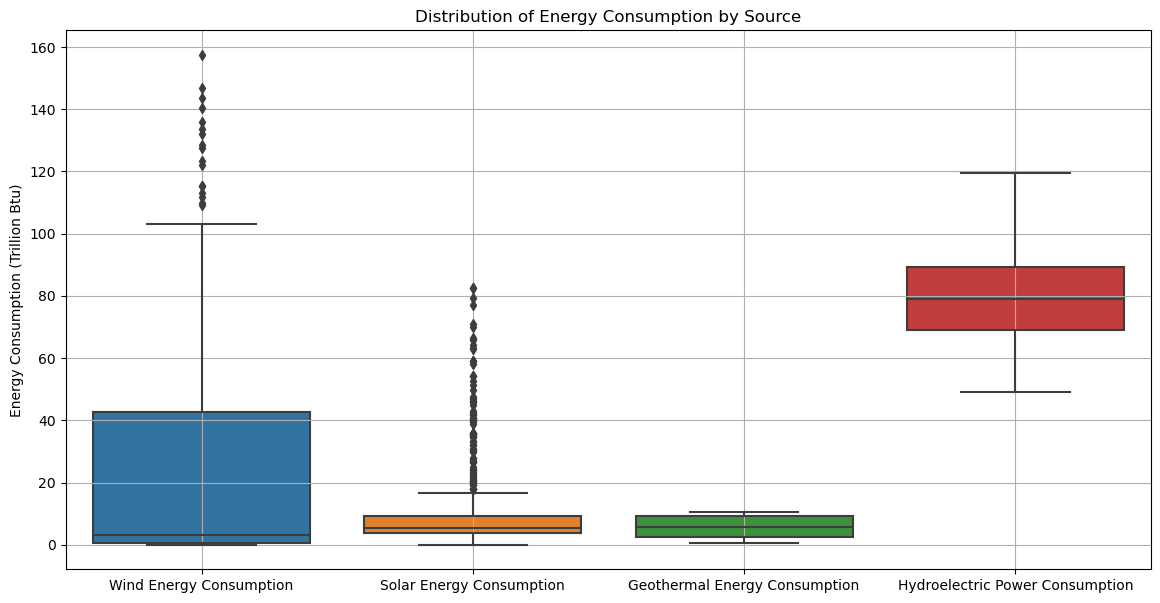

,Year,Total Renewable Energy Production


In [18]:
#In this case a data point that is is beyond 1.5 times the IQR is a data anomaly.

#calculating iqr
Q1 = energy_data_no_2023['Total Renewable Energy Production'].quantile(0.25)
Q3 = energy_data_no_2023['Total Renewable Energy Production'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold_high = Q3 + 1.5 * IQR
outlier_threshold_low = Q1 - 1.5 * IQR

#filtering
potential_outliers = energy_data_no_2023[
    (energy_data_no_2023['Total Renewable Energy Production'] > outlier_threshold_high) |
    (energy_data_no_2023['Total Renewable Energy Production'] < outlier_threshold_low)
]

#visualization
plt.figure(figsize=(14, 7))
sns.boxplot(data=energy_data_no_2023[['Wind Energy Consumption',
                                      'Solar Energy Consumption',
                                      'Geothermal Energy Consumption',
                                      'Hydroelectric Power Consumption']])
plt.title('Distribution of Energy Consumption by Source')
plt.ylabel('Energy Consumption (Trillion Btu)')
plt.grid(True)
plt.show()
potential_outliers[['Year', 'Total Renewable Energy Production']]


# Percentage YOY Increase Visualization

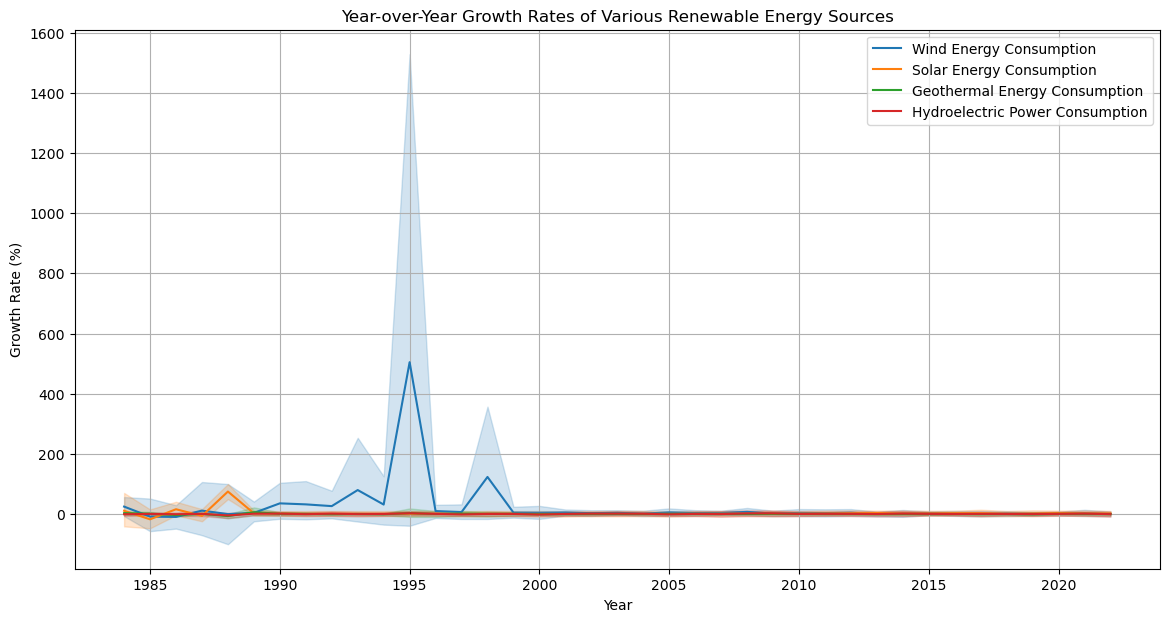

In [19]:
#comparing the growth of 4 variables below
energy_sources = ['Wind Energy Consumption', 'Solar Energy Consumption', 'Geothermal Energy Consumption', 'Hydroelectric Power Consumption']

#dataframe to store the growth rates
growth_rates = pd.DataFrame()

for source in energy_sources:
    #calculating yearly % growth
    growth_rates[source] = energy_data_no_2023[source].pct_change() * 100

#adding year for plotting
growth_rates['Year'] = energy_data_no_2023['Year']

#dropping the first row
growth_rates = growth_rates.dropna()

#graph
plt.figure(figsize=(14, 7))
for source in energy_sources:
    sns.lineplot(data=growth_rates, x='Year', y=source, label=source)
plt.title('Year-over-Year Growth Rates of Various Renewable Energy Sources')
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.legend()
plt.grid(True)
plt.show()


# Heatmap visualization

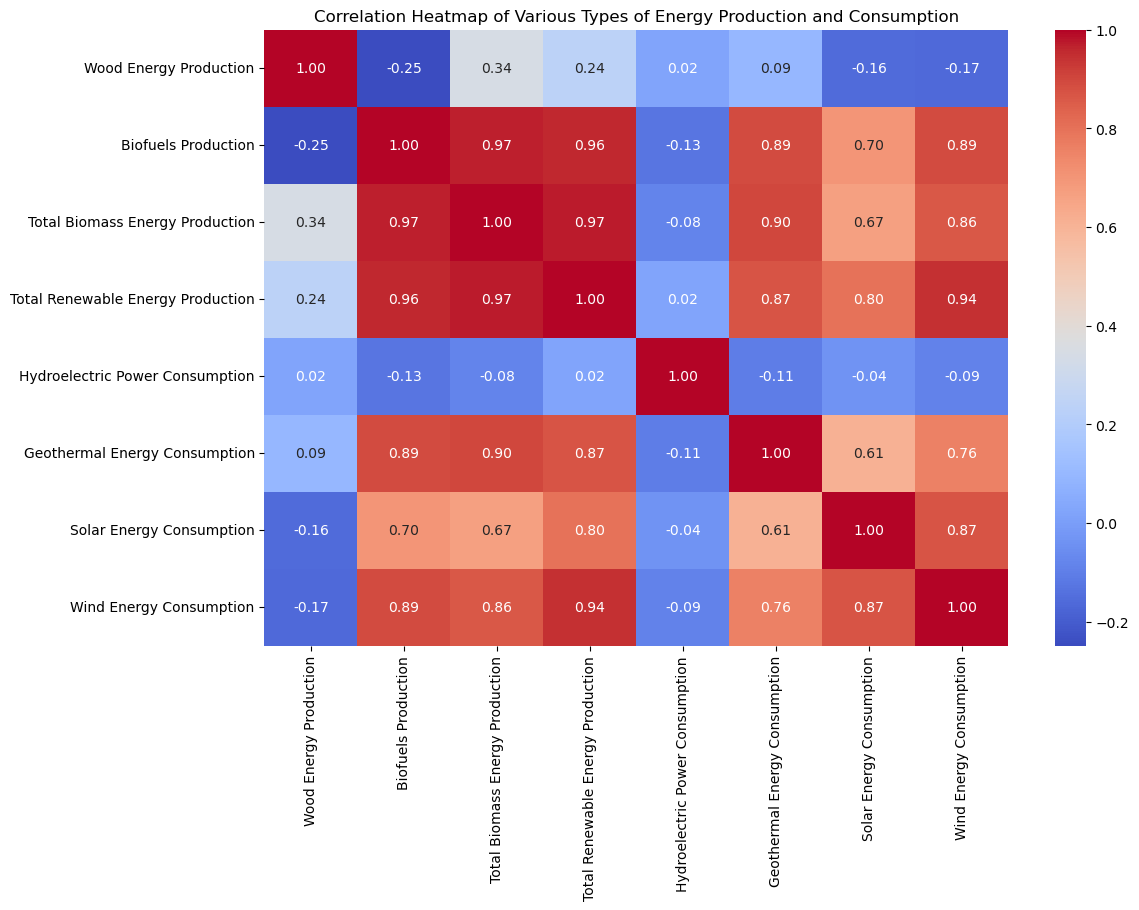

In [20]:
columns_for_heatmap = [
    'Wood Energy Production', 
    'Biofuels Production', 
    'Total Biomass Energy Production', 
    'Total Renewable Energy Production', 
    'Hydroelectric Power Consumption', 
    'Geothermal Energy Consumption', 
    'Solar Energy Consumption', 
    'Wind Energy Consumption'
]

heatmap_data = energy_data_no_2023[columns_for_heatmap].astype(float)

#corr matrix
correlation_matrix = heatmap_data.corr()

#heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Various Types of Energy Production and Consumption')
plt.show()


# Basic SQL Queries

In [21]:
#enabling pandasql
pysqldf = lambda q: sqldf(q, globals())

#Total renewable energy prod for the last 5 years.
query1 = """
SELECT Year, `Total Renewable Energy Production`
FROM energy_data_no_2023
WHERE Year >= 2019
ORDER BY Year;
"""

result1 = pysqldf(query1)

#average energy production per year.
query2 = """
SELECT Year, AVG(`Total Renewable Energy Production`) as Avg_Total_Renewable_Energy
FROM energy_data_no_2023
GROUP BY Year
ORDER BY Year;
"""

result2 = pysqldf(query2)

(result1, result2)


(    Year  Total Renewable Energy Production
 0   2019                            645.530
 1   2019                            593.795
 2   2019                            657.711
 3   2019                            666.642
 4   2019                            690.669
 5   2019                            661.828
 6   2019                            667.695
 7   2019                            648.350
 8   2019                            613.803
 9   2019                            634.265
 10  2019                            621.355
 11  2019                            651.174
 12  2020                            649.110
 13  2020                            632.884
 14  2020                            642.361
 15  2020                            561.380
 16  2020                            619.030
 17  2020                            637.875
 18  2020                            633.731
 19  2020                            619.356
 20  2020                            584.297
 21  2020 

In [22]:
query3 = """
SELECT Year, MAX(`Total Renewable Energy Production`) as Max_Production, MIN(`Total Renewable Energy Production`) as Min_Production
FROM energy_data
WHERE Year = 2020
GROUP BY Year;
"""
result3 = pysqldf(query3)
result3

,Year,Max_Production,Min_Production
0,2020,649.11,561.38


In [23]:
query4 = """
SELECT COUNT(*) as Months_Above_Threshold
FROM energy_data
WHERE `Solar Energy Consumption` > 100;
"""
result4 = pysqldf(query4)
result4
#As we can see, there are no rows that have above 100 Solar Energy Consumption

,Months_Above_Threshold
0,0


In [24]:
query5 = """
SELECT COUNT(*) as Months_Above_Threshold
FROM energy_data
WHERE `Wind Energy Consumption` > 100;
"""
result5 = pysqldf(query5)
result5
#As we can see, there are 27 rows that have above 100 Wind Energy Consumption

,Months_Above_Threshold
0,27


In [25]:
query6 = """
SELECT Month, Year, `Wind Energy Consumption`
FROM energy_data
ORDER BY `Wind Energy Consumption` DESC
LIMIT 3;
"""
result6 = pysqldf(query6)
result6

,Month,Year,Wind Energy Consumption
0,4,2022,157.522
1,3,2023,151.927
2,3,2022,146.820
